In [59]:
import os
import tensorflow
os.environ['KERAS_BACKEND'] = 'tensorflow'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # 3 = INFO, WARNING, and ERROR messages are not printed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image
from random import choice
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.regularizers import l1
from keras.optimizers import Adam
from random import choice

In [57]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [65]:

input_size = 784
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(784, activation='sigmoid')(input_img)
hidden_2 = Dense(78, activation='sigmoid')(hidden_1)
output_img = Dense(input_size,)(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(x_train, x_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 42s 696us/step - loss: 0.0219
Epoch 2/5
60000/60000 [==============================] - 38s 630us/step - loss: 0.0100
Epoch 3/5
60000/60000 [==============================] - 39s 642us/step - loss: 0.00894s - ETA: 0s - lo
Epoch 4/5
60000/60000 [==============================] - 38s 627us/step - loss: 0.0086
Epoch 5/5
60000/60000 [==============================] - 38s 638us/step - loss: 0.0084


In [63]:
def plot_autoencoder_outputs(autoencoder, n, dims):
    decoded_imgs = autoencoder.predict(x_test)

    # number of example digits to show
    n = 5
    plt.figure(figsize=(10, 4.5))
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Original Images')

        # plot reconstruction 
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Reconstructed Images')
    plt.show()

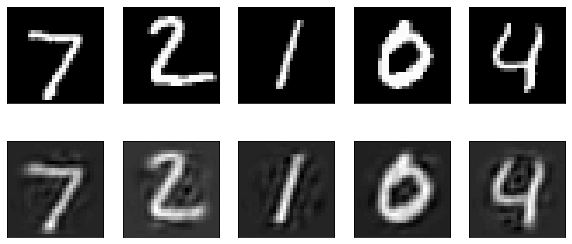

In [64]:
plot_autoencoder_outputs(autoencoder, 5, (28, 28))


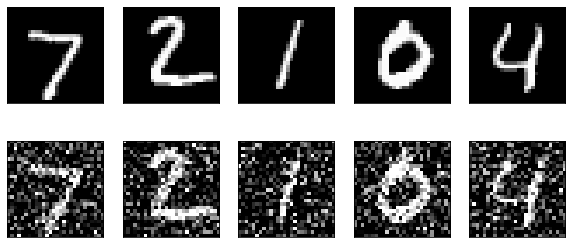

In [66]:
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

n = 5
plt.figure(figsize=(10, 4.5))
for i in range(n):
    # plot original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot noisy image 
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Noisy Input')


In [70]:
input_size = 784
hidden_size = 128
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(784, activation='sigmoid')(input_img)
#code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(78, activation='sigmoid')(hidden_1)
output_img = Dense(input_size, )(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(x_train_noisy, x_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 41s 687us/step - loss: 0.03041s - loss: 0.03
Epoch 2/10
60000/60000 [==============================] - 39s 642us/step - loss: 0.0187
Epoch 3/10
60000/60000 [==============================] - 41s 688us/step - loss: 0.0167
Epoch 4/10
60000/60000 [==============================] - 40s 666us/step - loss: 0.0156
Epoch 5/10
60000/60000 [==============================] - 40s 668us/step - loss: 0.01480
Epoch 6/10
60000/60000 [==============================] - 43s 725us/step - loss: 0.0143
Epoch 7/10
60000/60000 [==============================] - 40s 671us/step - loss: 0.0140
Epoch 8/10
60000/60000 [==============================] - 39s 643us/step - loss: 0.01370s - loss
Epoch 9/10
60000/60000 [==============================] - 41s 685us/step - loss: 0.01351s - loss - ETA: 1s - ETA: 0s - loss: 0.01
Epoch 10/10
60000/60000 [==============================] - 44s 726us/step - loss: 0.0133


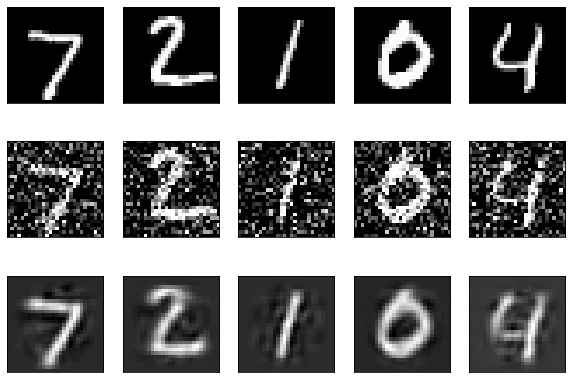

In [71]:
n = 5
plt.figure(figsize=(10, 7))

images = autoencoder.predict(x_test_noisy)

for i in range(n):
    # plot original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot noisy image 
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Noisy Input')
        
    # plot noisy image 
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Autoencoder Output')

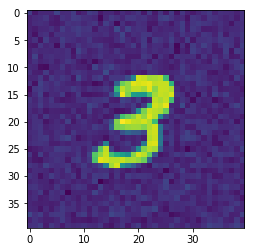

In [55]:
# img = image.load_img(path = r'mnist.png',
#                            target_size=(40,40), grayscale=True)
# img = image.img_to_array(img)
# img = np.expand_dims(img,axis=0)

# noice = np.random.randn(1600).reshape(40,40)

# plt.imshow(img[0].reshape(40,40) + noice*10)
